# 1- Initialisation

In [1]:
# Librairies pour le traitement des données
from my_functions.common_functions import *
from my_functions.uni_bi_variate_functions import *
from my_functions.pca_functions import *

%matplotlib inline

low_memory=False # faible mémoire vive (RAM)

In [2]:
# Récupération des Data Sets
df = pd.read_csv('data.csv', index_col=0, low_memory=low_memory)
mean_imputed_data = pd.read_csv('mean_imputed_data.csv', index_col=0, low_memory=low_memory)
iter_imputed_data = pd.read_csv('iter_imputed_data.csv', index_col=0, low_memory=low_memory)
knn_imputed_data = pd.read_csv('knn_imputed_data.csv', index_col=0, low_memory=low_memory)

# 2- Analyse Univariée : distributions

In [3]:
# histo_distribution(df)

# 2- Analyse Bivariée : corrélations

Dans cette partie on recherche les variables au dessus d'un certain niveau de corrélation

In [4]:
# correlation_matrix(df.iloc[:, :-4], 0.3, squared=True)

On observe que plusieurs variables sont fortement corrélées entre elles.

# 3- Analyse Multivariée

## 3.0- Analyse en Composantes Principales (PCA)

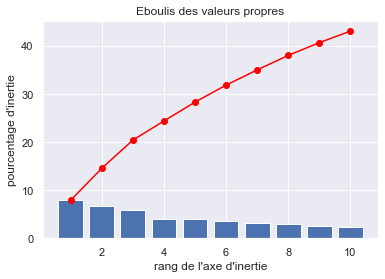

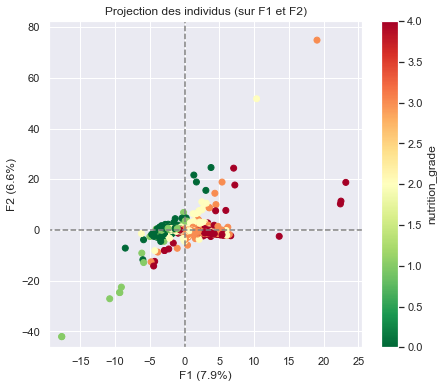

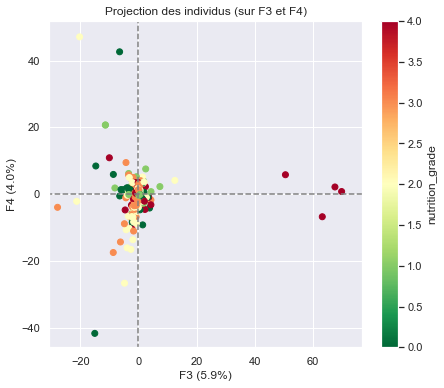

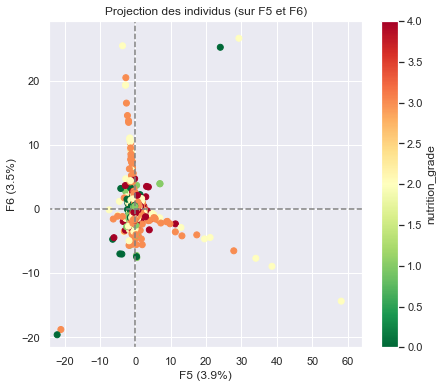

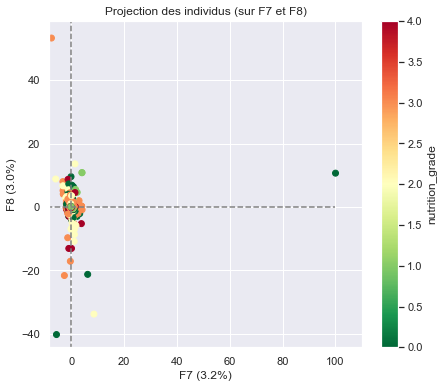

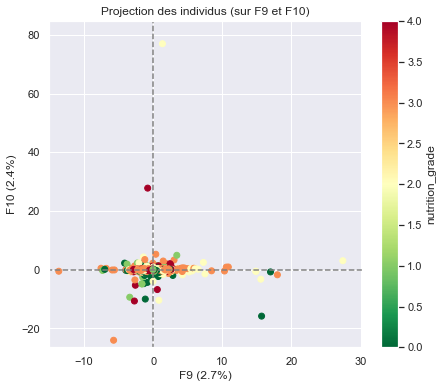

In [5]:
X = mean_imputed_data
X['nutrition_grade'] = mean_imputed_data['nutrition_grade']
	
pcs = PCA(X, 10, continuous_illustrative_var=X['nutrition_grade'], enable_display_circles=False)
pca_reduced = pd.concat([PCA_Compression(X, pcs), X['nutrition_grade']], axis=1)

On Constate malgré le grand nombre de composantes, l'ACP donne une faiblement pertinente projection (total d'inertie < 40%)
<br>
Il est préférable d’identifier les groupes de variables similaires ou participant à des sous-phénomènes similaires, afin de maximiser le gain de la réduction dimensionnelle avant de l'entamer.
<br>
Autrement dit, on s’intéresse aux groupes de variables similaires pour les réduire efficacement avec des ACPs successives.

## 3.1- Regroupement des variables similaires

Grâce à l'analyse des distributions des variables et de leurs corrélations, plus la définition des ces variables, on peut regrouper les variables similaires comme suit

In [6]:
groups_cols = {}

### 3.1.1- Glucides

In [7]:
glucids_cols = [col for col in df.columns.tolist() if 'ose' in col or col in ['carbohydrates_100g', 'starch_100g', 'sugars_100g']]
groups_cols['glucids_cols'] = glucids_cols
print(len(glucids_cols), 'cols:', "', '".join(glucids_cols))

# histo_distribution(df[glucids_cols])
# correlation_matrix(df[glucids_cols], triangle=False)

6 cols: carbohydrates_100g', 'sugars_100g', 'sucrose_100g', 'fructose_100g', 'lactose_100g', 'starch_100g


### 3.1.2- Gras & Acides

In [8]:
fatcids_cols = [col for col in df.columns.tolist() if 'fat' in col or 'acid' in col]
groups_cols['fatcids_cols'] = fatcids_cols
print(len(fatcids_cols), 'cols:', "', '".join(fatcids_cols))

# histo_distribution(df[fatcids_cols])
# correlation_matrix(df[fatcids_cols], triangle=False)

13 cols: energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'omega-3-fat_100g', 'alpha-linolenic-acid_100g', 'eicosapentaenoic-acid_100g', 'docosahexaenoic-acid_100g', 'omega-6-fat_100g', 'linoleic-acid_100g', 'trans-fat_100g', 'pantothenic-acid_100g


### 3.1.3- Sels & Minéreaux

In [9]:
salt_minerals_cols = [col for col in df.columns.tolist() if col in ['fluoride_100g', 'iodine_100g', 'salt_100g'] or 'ium' in col]
groups_cols['salt_minerals_cols'] = salt_minerals_cols
print(len(salt_minerals_cols), 'cols:', "', '".join(salt_minerals_cols))

# histo_distribution(df[salt_minerals_cols])
# correlation_matrix(df[salt_minerals_cols], triangle=False)

8 cols: salt_100g', 'sodium_100g', 'potassium_100g', 'calcium_100g', 'magnesium_100g', 'fluoride_100g', 'selenium_100g', 'iodine_100g


### 3.1.4- Vitamines

In [10]:
vitamins_cols = [col for col in df.columns.tolist() if 'vitamin' in col]
groups_cols['vitamins_cols'] = vitamins_cols
print(len(vitamins_cols), 'cols:', "', '".join(vitamins_cols))

# histo_distribution(df[vitamins_cols])
# correlation_matrix(df[vitamins_cols], triangle=False, sort=True)

11 cols: vitamin-a_100g', 'vitamin-d_100g', 'vitamin-e_100g', 'vitamin-k_100g', 'vitamin-c_100g', 'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-pp_100g', 'vitamin-b6_100g', 'vitamin-b9_100g', 'vitamin-b12_100g


### 3.1.5- Autres

In [11]:
other_cols = colsOfType(df, ['int', 'float'])[3:-4]
other_cols = [col for col in other_cols if 'fat' not in col and 'ose' not in col and 'acid' not in col and 'vitamin' not in col and 'ium' not in col and col not in ['fluoride_100g', 'iodine_100g', 'salt_100g','carbohydrates_100g', 'starch_100g', 'sugars_100g']]
groups_cols['other_cols'] = other_cols
print(len(other_cols), 'cols:', "', '".join(other_cols))

# histo_distribution(df[other_cols])
# correlation_matrix(df[other_cols], triangle=False)

22 cols: energy_100g', 'cholesterol_100g', 'polyols_100g', 'fiber_100g', 'proteins_100g', 'alcohol_100g', 'beta-carotene_100g', 'folates_100g', 'biotin_100g', 'silica_100g', 'bicarbonate_100g', 'chloride_100g', 'phosphorus_100g', 'iron_100g', 'zinc_100g', 'copper_100g', 'manganese_100g', 'caffeine_100g', 'ph_100g', 'fruits-vegetables-nuts_100g', 'collagen-meat-protein-ratio_100g', 'cocoa_100g


## 3.2- Réduction Dimensionnelle

### 3.2.1- Sur l'Imputation Simple

In [12]:
X = mean_imputed_data
X['nutrition_grade'] = mean_imputed_data['nutrition_grade']

#### 3.2.1.1- Réduction des Colonnes: Analyse en Composantes Principales (PCA) Successives

On réduit chaque groupe de variables/colonnes.

/------------------------------------------ PCA on glucids_cols ------------------------------------------/


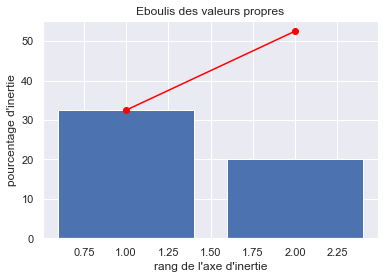

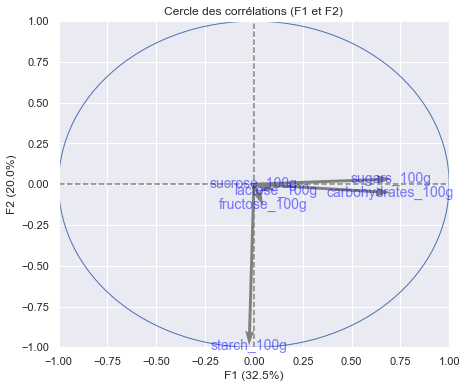

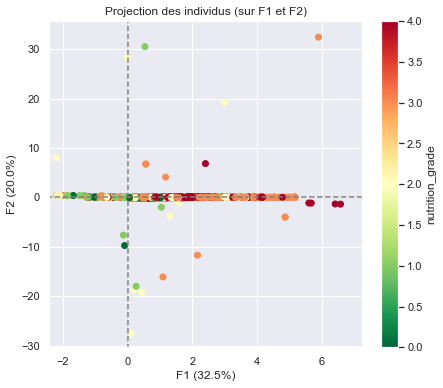

/------------------------------------------ PCA on fatcids_cols ------------------------------------------/


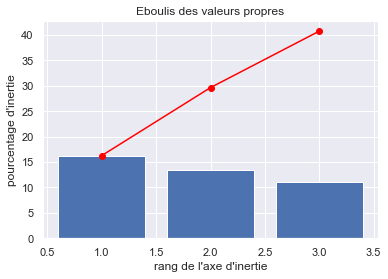

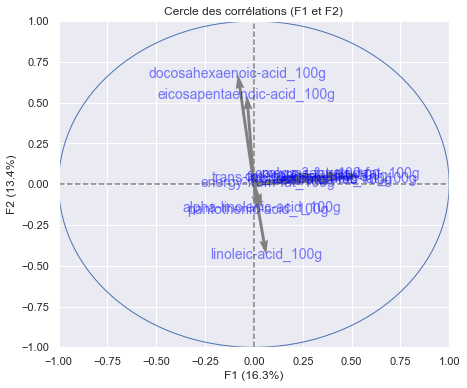

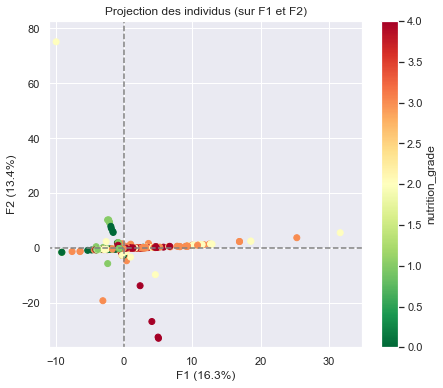

/------------------------------------------ PCA on salt_minerals_cols ------------------------------------------/


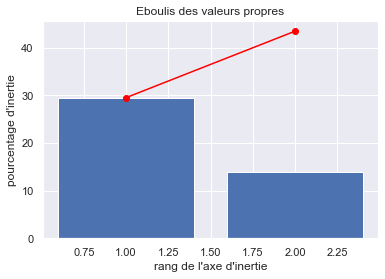

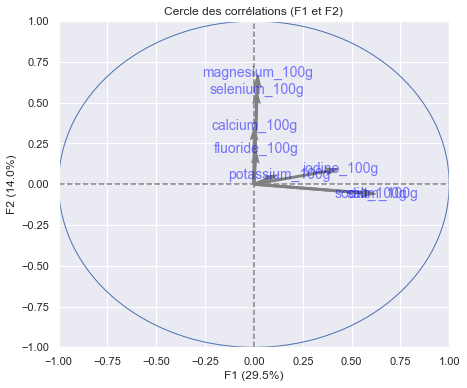

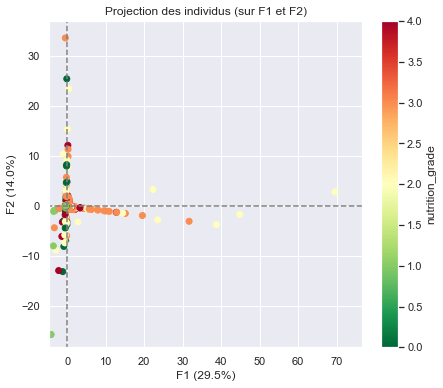

/------------------------------------------ PCA on vitamins_cols ------------------------------------------/


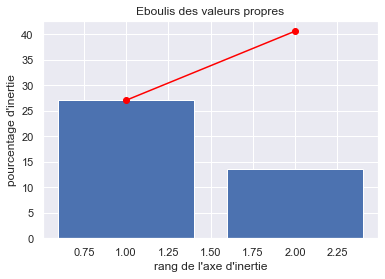

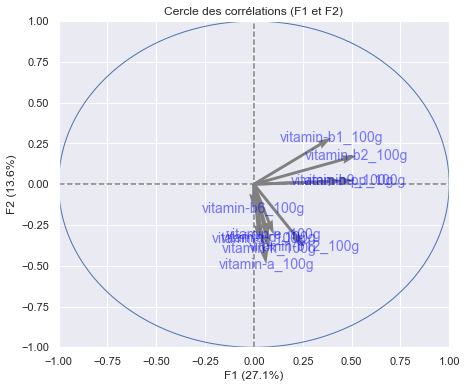

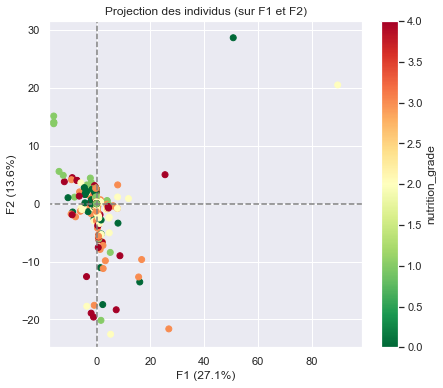

/------------------------------------------ PCA on other_cols ------------------------------------------/


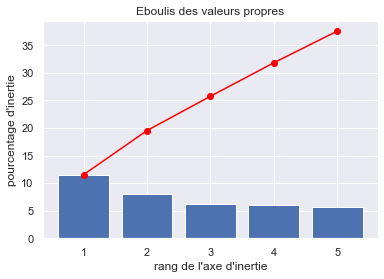

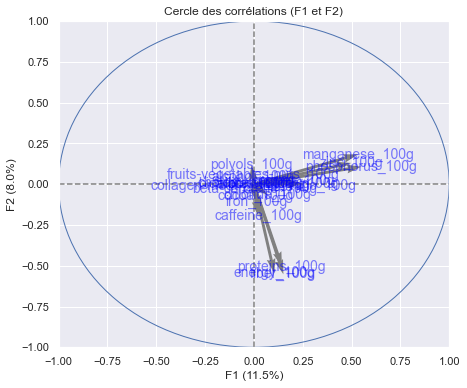

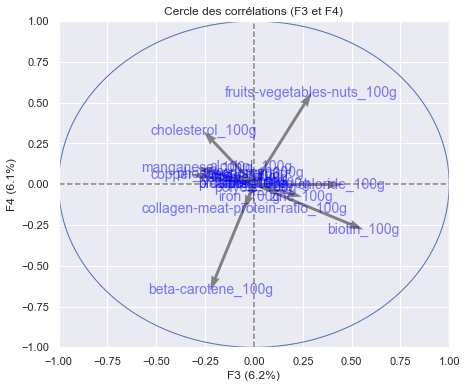

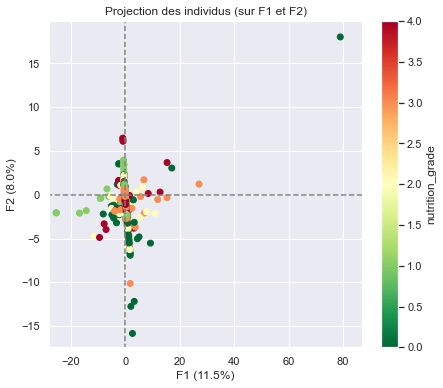

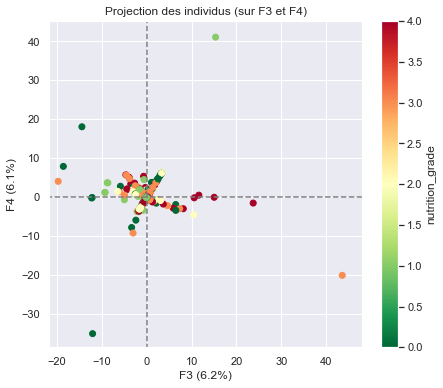

In [13]:
pca_reduced = pd.DataFrame(index=X.index)
pcs_lvl1 = {}

for group_name, group_cols in groups_cols.items():
    print('/------------------------------------------ PCA on', group_name,'------------------------------------------/')
    pcs = PCA(X, max(2, len(group_cols)//4), group_cols, continuous_illustrative_var=X['nutrition_grade'], enable_display_circles=True)
    pcs_lvl1[group_name] = pcs
    pca_reduced = pd.concat([pca_reduced, PCA_Compression(X, pcs, group_cols, group_name)], axis=1)

On réduit une fois de plus les colonnes déjà réduites.

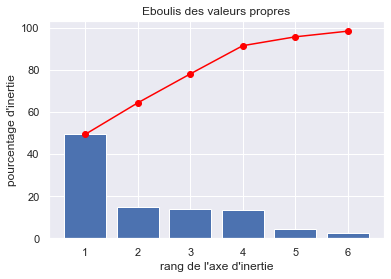

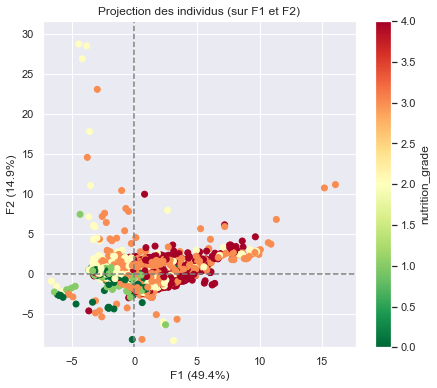

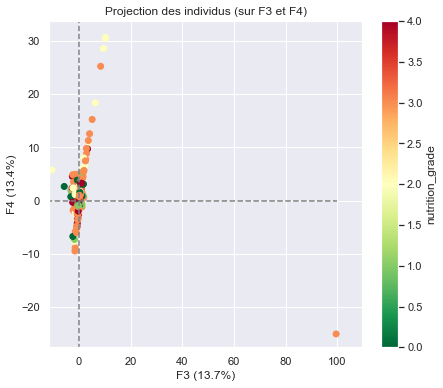

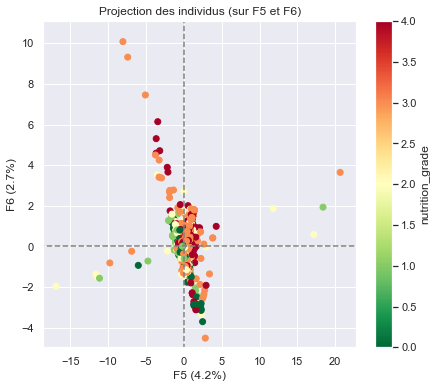

In [14]:
pcs = PCA(pca_reduced, 6, continuous_illustrative_var=X['nutrition_grade'], enable_display_circles=False)
pcs_lvl2 = pcs
pca_reduced = pd.concat([PCA_Compression(X, pcs), X['nutrition_grade']], axis=1)

In [15]:
pca_reduced

,comp1,comp2,comp3,comp4,comp5,comp6,nutrition_grade
241334,-47.550100,-42.522323,-11.508663,45.530827,60.626562,-143.476580,1.0
217421,102.295756,96.429250,-33.202475,-70.230727,-40.348371,-34.980902,2.0
221049,-11.582670,-11.896379,-16.970886,17.479936,37.311364,-115.896836,1.0
274445,-25.642203,-25.420227,-15.050667,28.031287,46.860657,-125.987707,0.0
206168,-19.685784,-20.319565,-15.805171,23.933203,43.189811,-121.061396,0.0
...,...,...,...,...,...,...,...
253056,294.639110,277.971814,-60.686016,-218.264057,-170.868015,102.687870,1.0
231526,537.744933,503.923870,-96.846129,-409.681536,-335.251442,276.631898,4.0
206027,370.707550,345.428206,-70.787653,-272.897209,-219.477177,162.346654,3.0
300986,-103.635509,-96.701399,-3.661515,88.387532,99.063984,-183.043456,0.0


#### 3.2.1.2- Réduction des lignes: Clustering K-Means

In [16]:
from sklearn.cluster import KMeans

# Nombre de clusters souhaités (taux  de compression)
data = pca_reduced
n_clust = int(len(data)*0.2)
print('Taille du data set original :', len(data), 'Taille du data set réduit :', n_clust)

# préparation des données pour le clustering
X = data.values
X_scaled = Std_Scaled(X)

# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km_X = km.fit(X_scaled)

reduced_mean_imputed_data = km_X.cluster_centers_ 

Taille du data set original : 5778 Taille du data set réduit : 1155


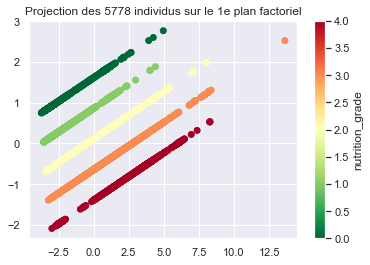

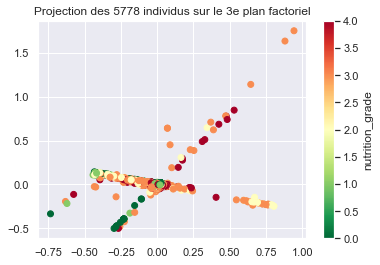

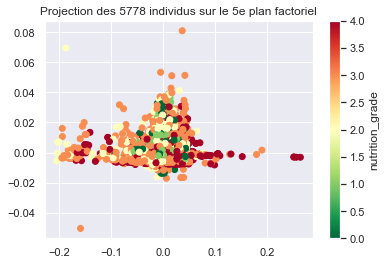

In [17]:
from sklearn import decomposition

# Récupération des clusters attribués à chaque individu
clusters = km.labels_

# Affichage du clustering par projection des individus sur le premier plan factoriel
n_components=6
pca = decomposition.PCA(n_components=n_components).fit(X_scaled)
X_projected = pca.transform(X_scaled)

for i in range(0,n_components,2):
    plt.scatter(X_projected[:, i], X_projected[:, i+1], c=X[:, -1], cmap = sns.color_palette('RdYlGn_r', as_cmap=True), alpha=1)
    plt.title('Projection des {} individus sur le {}e plan factoriel'.format(X_projected.shape[0], i+1))
    plt.colorbar(label='nutrition_grade')
    plt.show(block=False)

### 3.2.2- Sur l'Imputation Itérative

In [18]:
X = iter_imputed_data
X['nutrition_grade'] = iter_imputed_data['nutrition_grade']

#### 3.2.2.1- Réduction des Colonnes: Analyse en Composantes Principales (PCA) Successives

On réduit chaque groupe de variables/colonnes.

/------------------------------------------ PCA on glucids_cols ------------------------------------------/


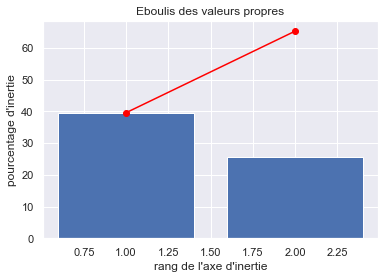

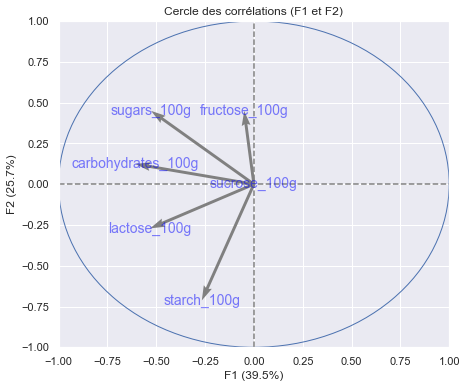

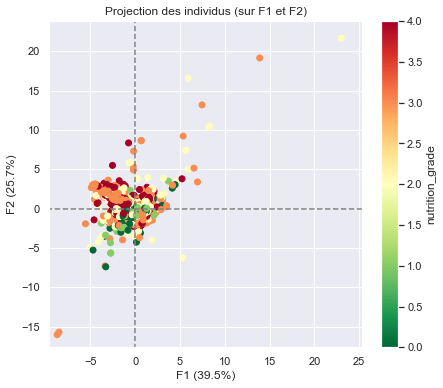

/------------------------------------------ PCA on fatcids_cols ------------------------------------------/


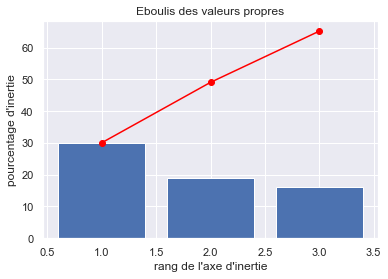

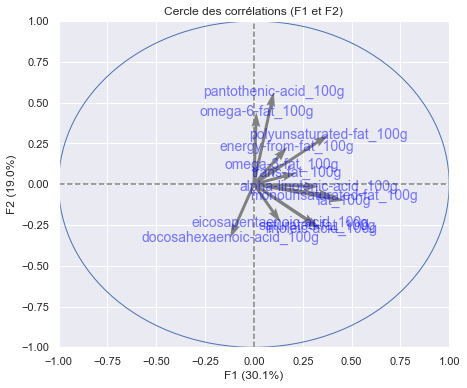

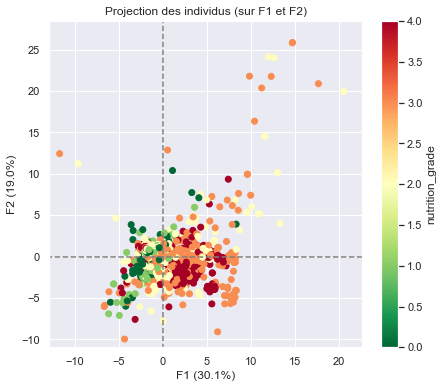

/------------------------------------------ PCA on salt_minerals_cols ------------------------------------------/


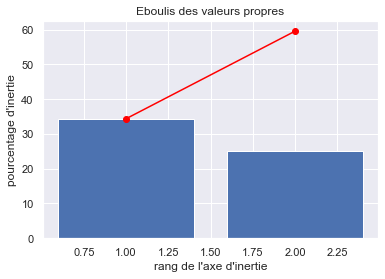

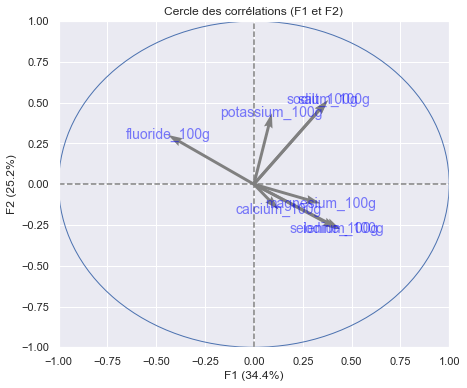

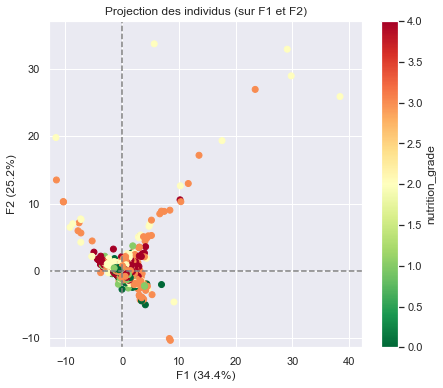

/------------------------------------------ PCA on vitamins_cols ------------------------------------------/


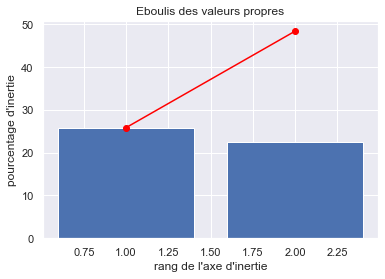

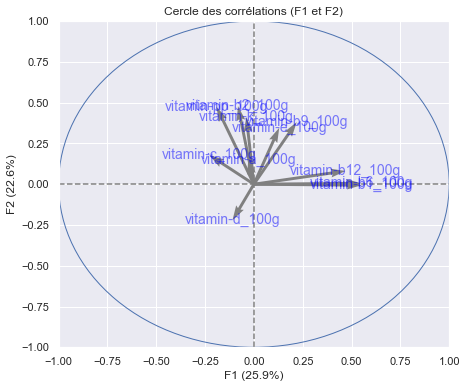

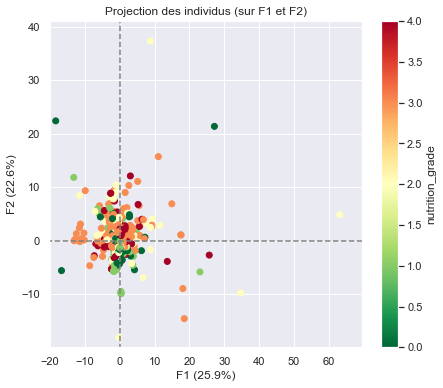

/------------------------------------------ PCA on other_cols ------------------------------------------/


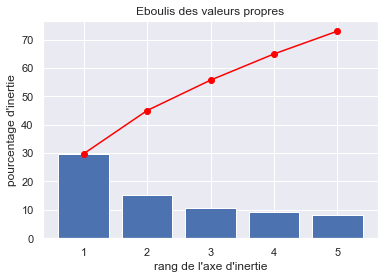

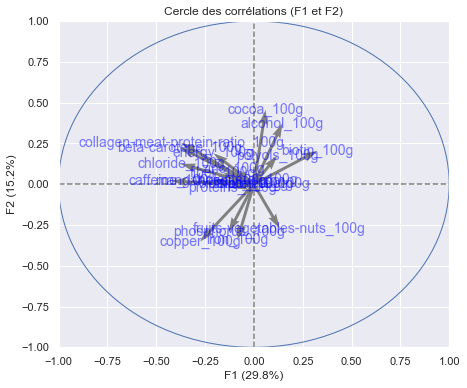

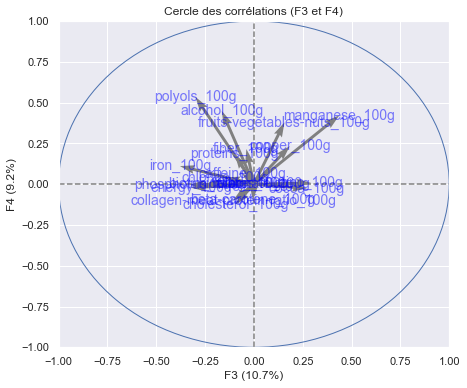

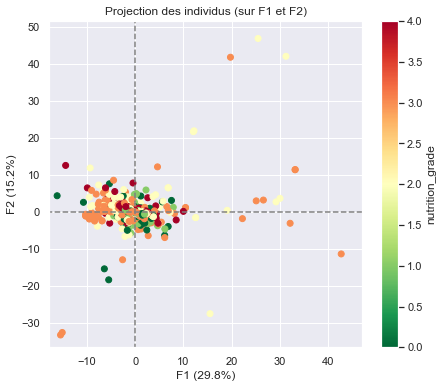

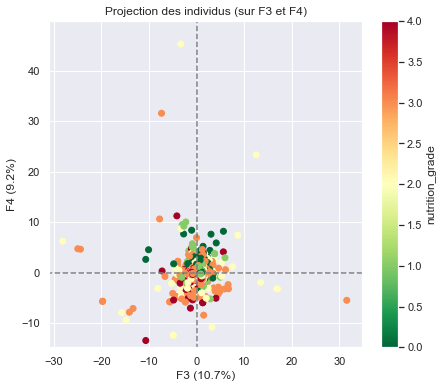

In [19]:
pca_reduced = pd.DataFrame(index=X.index)
pcs_lvl1 = {}

for group_name, group_cols in groups_cols.items():
    print('/------------------------------------------ PCA on', group_name,'------------------------------------------/')
    pcs = PCA(X, max(2, len(group_cols)//4), group_cols, continuous_illustrative_var=X['nutrition_grade'], enable_display_circles=True)
    pcs_lvl1[group_name] = pcs
    pca_reduced = pd.concat([pca_reduced, PCA_Compression(X, pcs, group_cols, group_name)], axis=1)

On réduit une fois de plus les colonnes déjà réduites.

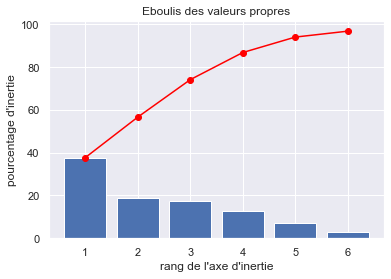

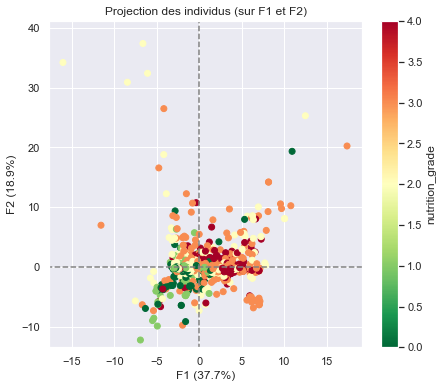

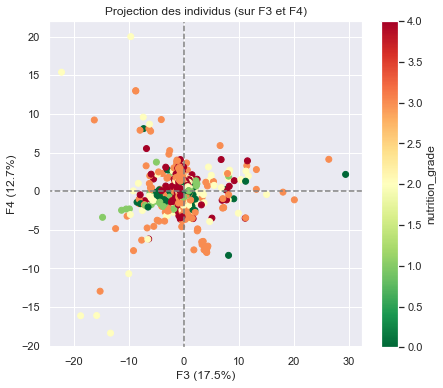

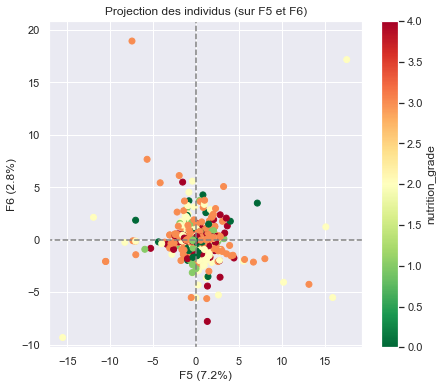

In [20]:
pcs = PCA(pca_reduced, 6, continuous_illustrative_var=X['nutrition_grade'], enable_display_circles=False)
pcs_lvl2 = pcs
pca_reduced = pd.concat([PCA_Compression(X, pcs), X['nutrition_grade']], axis=1)

In [21]:
pca_reduced

,comp1,comp2,comp3,comp4,comp5,comp6,nutrition_grade
241334,-22.864873,-55.042428,-87.555672,-16.696614,-22.940242,-0.586788,1.0
217421,15.631609,117.920920,153.329542,45.884450,14.016164,-4.421256,2.0
221049,-14.515984,-15.409792,-29.838460,-3.357972,-14.949236,-0.744302,1.0
274445,-18.336868,-34.352494,-52.175323,-8.432491,-19.831205,-0.093174,0.0
206168,-17.179366,-27.362062,-42.565369,-6.327383,-18.755934,-0.150698,0.0
...,...,...,...,...,...,...,...
253056,65.141889,346.321026,456.813534,126.019059,64.170633,-11.046619,1.0
231526,129.812667,640.439929,848.917689,218.695805,140.052951,-16.854434,4.0
206027,82.730274,429.070871,576.171815,154.119807,76.819611,-10.762505,3.0
300986,-37.957710,-122.051935,-175.981436,-40.173048,-38.041131,1.301859,0.0


#### 3.2.2.2- Réduction des lignes: Clustering K-Means

In [22]:
from sklearn.cluster import KMeans

# Nombre de clusters souhaités (taux  de compression)
data = pca_reduced
n_clust = int(len(data)*0.2)
print('Taille du data set original :', len(data), 'Taille du data set réduit :', n_clust)

# préparation des données pour le clustering
X = data.values
X_scaled = Std_Scaled(X)

# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km_X = km.fit(X_scaled)

reduced_iter_imputed_data = km_X.cluster_centers_ 

Taille du data set original : 5778 Taille du data set réduit : 1155


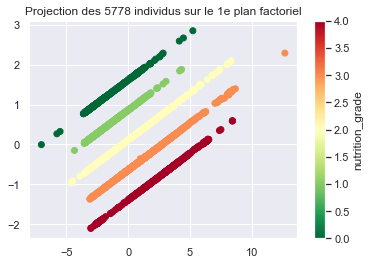

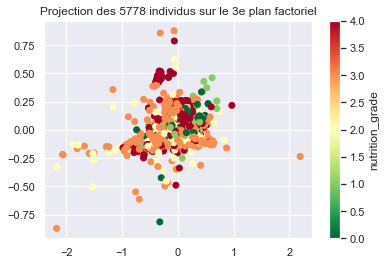

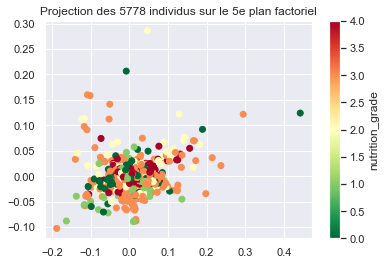

In [23]:
from sklearn import decomposition

# Récupération des clusters attribués à chaque individu
clusters = km.labels_

# Affichage du clustering par projection des individus sur le premier plan factoriel
n_components=6
pca = decomposition.PCA(n_components=n_components).fit(X_scaled)
X_projected = pca.transform(X_scaled)

for i in range(0,n_components,2):
    plt.scatter(X_projected[:, i], X_projected[:, i+1], c=X[:, -1], cmap = sns.color_palette('RdYlGn_r', as_cmap=True), alpha=1)
    plt.title('Projection des {} individus sur le {}e plan factoriel'.format(X_projected.shape[0], i+1))
    plt.colorbar(label='nutrition_grade')
    plt.show(block=False)

### 3.2.3- Sur l'Imputation K-NN

In [38]:
X = knn_imputed_data
X['nutrition_grade'] = knn_imputed_data['nutrition_grade']

#### 3.2.3.1- Réduction des Colonnes: Analyse en Composantes Principales (PCA) Successives

On réduit chaque groupe de variables/colonnes.

/------------------------------------------ PCA on glucids_cols ------------------------------------------/


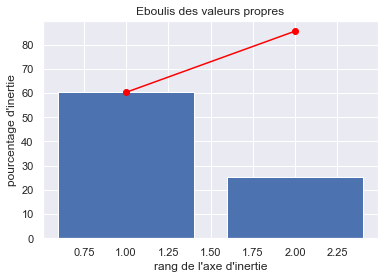

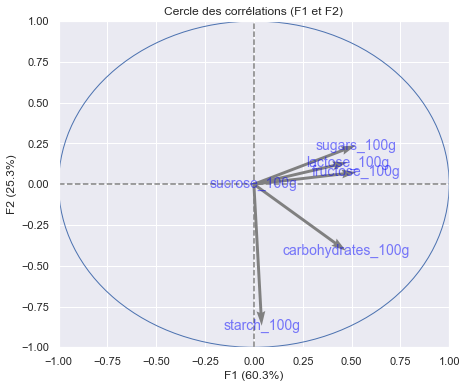

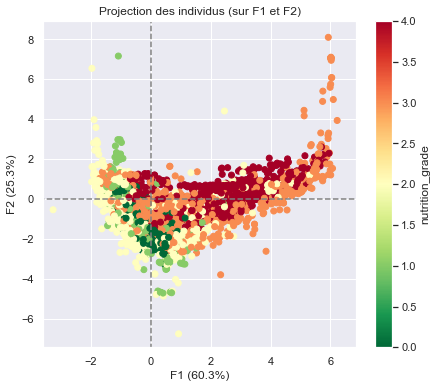

/------------------------------------------ PCA on fatcids_cols ------------------------------------------/


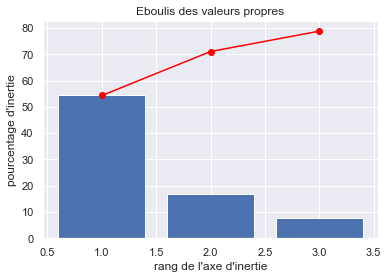

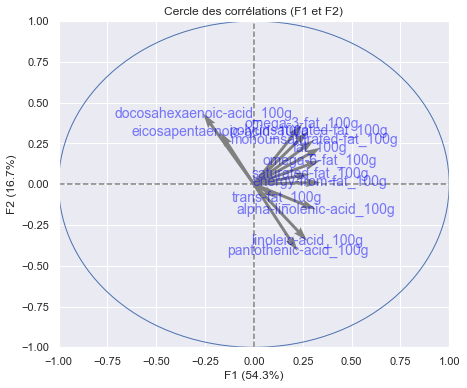

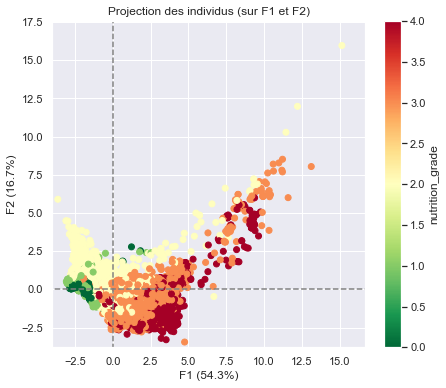

/------------------------------------------ PCA on salt_minerals_cols ------------------------------------------/


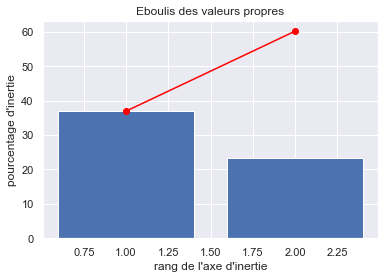

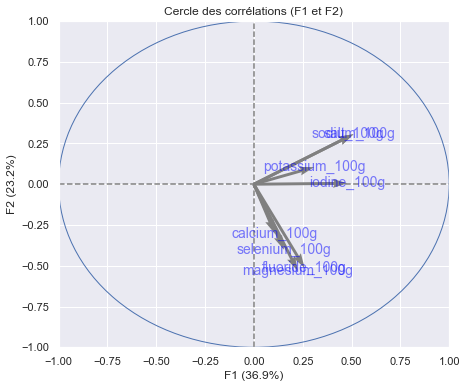

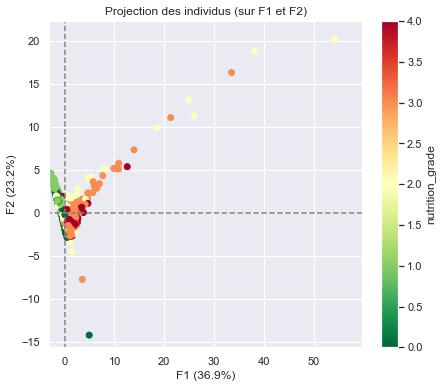

/------------------------------------------ PCA on vitamins_cols ------------------------------------------/


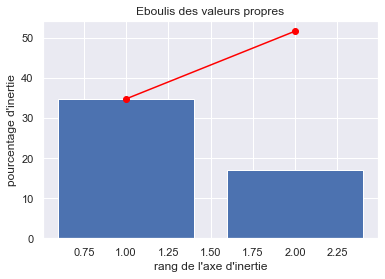

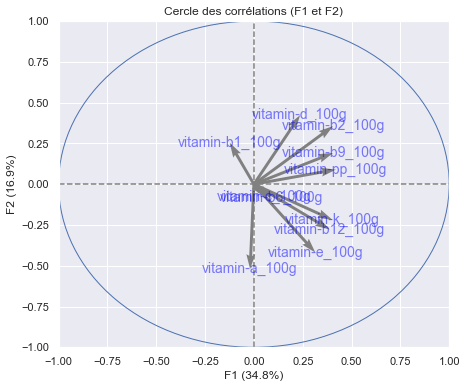

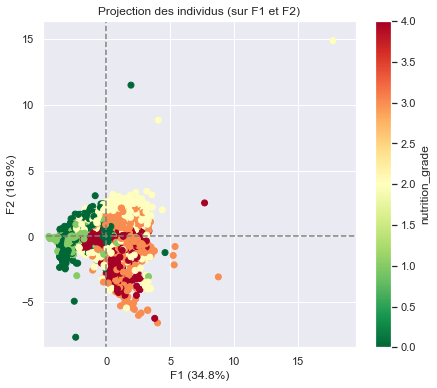

/------------------------------------------ PCA on other_cols ------------------------------------------/


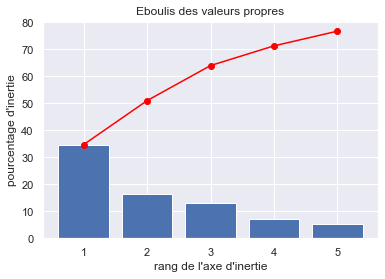

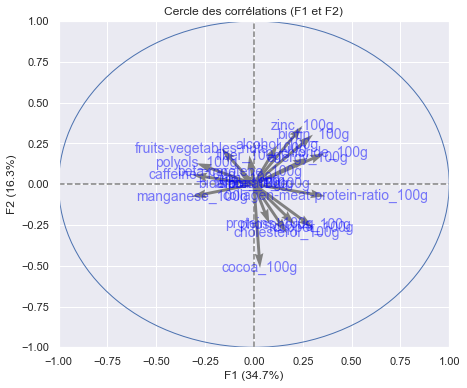

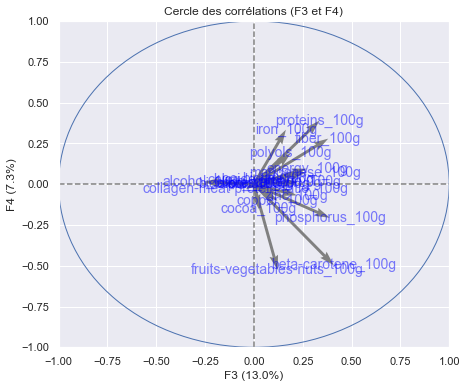

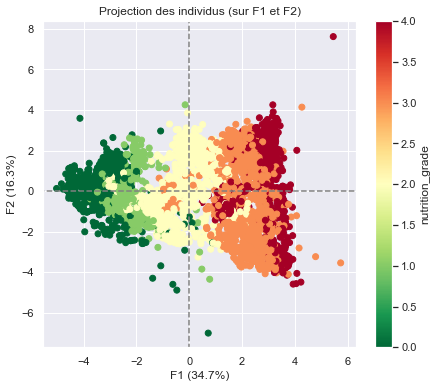

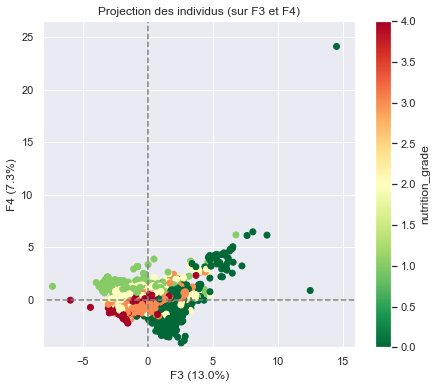

In [39]:
pca_reduced = pd.DataFrame(index=X.index)
pcs_lvl1 = {}

for group_name, group_cols in groups_cols.items():
    print('/------------------------------------------ PCA on', group_name,'------------------------------------------/')
    pcs = PCA(X, max(2, len(group_cols)//4), group_cols, continuous_illustrative_var=X['nutrition_grade'], enable_display_circles=True)
    pcs_lvl1[group_name] = pcs
    pca_reduced = pd.concat([pca_reduced, PCA_Compression(X, pcs, group_cols, group_name)], axis=1)

On réduit une fois de plus les colonnes déjà réduites.

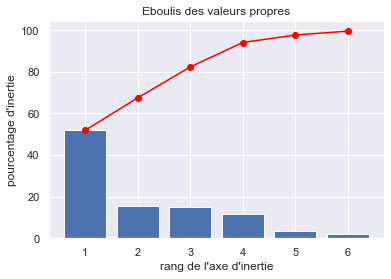

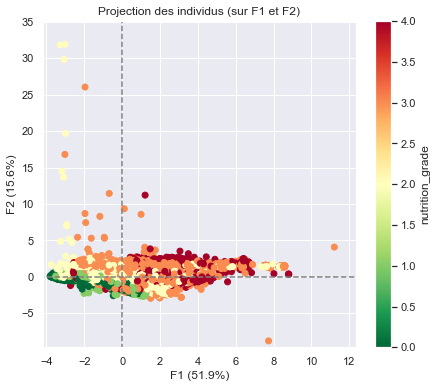

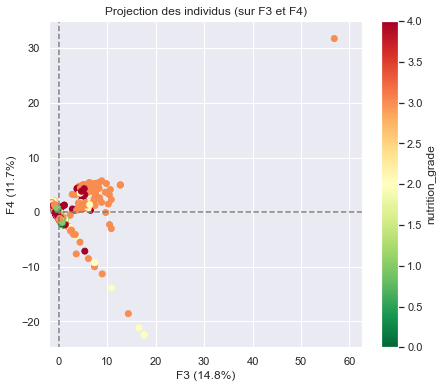

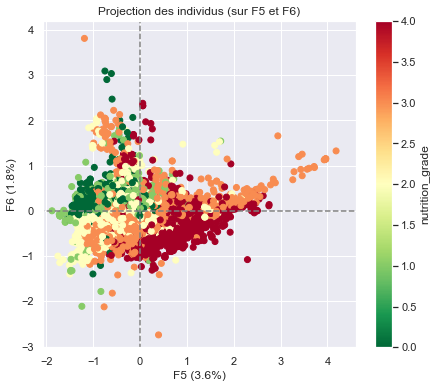

In [40]:
pcs = PCA(pca_reduced, 6, continuous_illustrative_var=X['nutrition_grade'], enable_display_circles=False)
pcs_lvl2 = pcs
pca_reduced = pd.concat([PCA_Compression(X, pcs), X['nutrition_grade']], axis=1)

In [41]:
pca_reduced

,comp1,comp2,comp3,comp4,comp5,comp6,nutrition_grade
241334,121.795867,97.205646,-46.162564,84.008362,-15.359303,-26.287995,1.0
217421,317.965368,248.568414,-121.417884,220.547116,-43.132985,-40.091146,2.0
221049,159.512719,124.441399,-61.387567,109.208640,-21.191838,-14.112153,1.0
274445,128.109663,97.451439,-50.943013,89.296811,-19.992669,9.696793,0.0
206168,134.289536,101.828364,-53.090213,93.215724,-20.534502,11.636194,0.0
...,...,...,...,...,...,...,...
253056,496.899639,382.752260,-198.397530,351.048224,-87.896457,65.307904,1.0
231526,977.724055,787.724520,-360.819770,668.234336,-115.943718,-240.421271,4.0
206027,617.696674,480.124964,-237.175174,426.994557,-94.892854,20.760313,3.0
300986,39.960681,30.959980,-15.529896,27.889610,-4.586761,-6.942312,0.0


#### 3.2.3.2- Réduction des lignes: Clustering K-Means

In [42]:
from sklearn.cluster import KMeans

# Nombre de clusters souhaités (taux  de compression)
data = pca_reduced
n_clust = int(len(data)*0.2)
print('Taille du data set original :', len(data), 'Taille du data set réduit :', n_clust)

# préparation des données pour le clustering
X = data.values
X_scaled, scaler = Std_Scaled(X, return_scaler=True)

# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km_X = km.fit(X_scaled)

reduced_knn_imputed_data = km_X.cluster_centers_ 

Taille du data set original : 5778 Taille du data set réduit : 1155


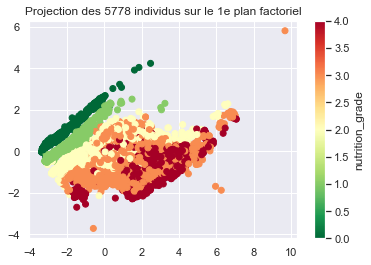

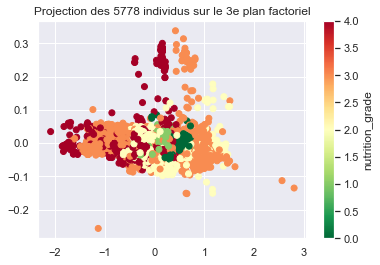

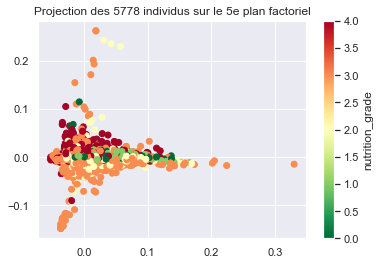

In [43]:
from sklearn import decomposition

# Récupération des clusters attribués à chaque individu
clusters = km.labels_

# Affichage du clustering par projection des individus sur le premier plan factoriel
n_components=6
pca = decomposition.PCA(n_components=n_components).fit(X_scaled)
X_projected = pca.transform(X_scaled)

for i in range(0,n_components,2):
    plt.scatter(X_projected[:, i], X_projected[:, i+1], c=X[:, -1], cmap = sns.color_palette('RdYlGn_r', as_cmap=True), alpha=1)
    plt.title('Projection des {} individus sur le {}e plan factoriel'.format(X_projected.shape[0], i+1))
    plt.colorbar(label='nutrition_grade')
    plt.show(block=False)

## 3.3- Conclusions sur l'Analyse Multivariée

Premièrement, on constate l'amélioration de la pertinence des projections ACP (70-100% d'inertie totale), ce qui confirme l'intérêt d'avoir regroupé les variables par groupes similaires.
<br>
Ensuite d'après les résultats des réductions dimensionnelles (ACPs + K-Means), on constate que les données imputées par K-NN ont une meilleure projection/réduction que les données des autres méthodes d'imputation (simple et itérative).
<br>
Cela indique que le modèle prédictif construit sur les données imputées par K-NN aura très probablement les meilleurs résultats (prédictions).
<br>
On confirme cette conclusion dans la dernière partie.

# 4- Construction du modèle prédectif robuste: K-NN

Maintenant que les data sets sont réduits dimensionnellement, on construit le modèle prédictif robuste du nutri-score avec K-NN.

In [44]:
from my_functions.knn_functions import *

best_knn_mse = 100
best_knn_model = None
best_imputed_data = None

## 4.1- Sur l'Imputation Simple

In [57]:
data = pd.DataFrame(scaler.inverse_transform(reduced_mean_imputed_data), columns=pca_reduced.columns)
data['nutrition_grade'] = data['nutrition_grade'].astype('int')

mean_imputed_best_k, mean_imputed_min_error, mean_imputed_best_knn, mean_imputed_errors, mean_imputed_ks = best_knn(data, Y='nutrition_grade', regression=False, repeat_factor=100)
print('Best k=' + str(mean_imputed_best_k) + ', MSE=' + str(round(mean_imputed_min_error,2)) + '%')

if mean_imputed_min_error < best_knn_mse:
    best_knn_model = mean_imputed_best_knn
    best_imputed_data = mean_imputed_data

,comp1,comp2,comp3,comp4,comp5,comp6,nutrition_grade
0,233.993323,181.507845,-92.014081,512.029776,-26.510808,-220.288546,2
1,729.394788,582.830092,-270.005236,170.227029,-91.282196,-1.773287,3
2,1487.364789,1226.998983,-632.374066,-301.706425,-189.685639,337.712891,3
3,117.307420,90.347935,-50.696032,590.877565,-11.680434,-274.024471,0
4,988.614720,799.538523,-353.893083,1.833989,-124.887486,114.484188,3
...,...,...,...,...,...,...,...
1150,214.245579,166.726837,-85.783388,524.191193,-24.149852,-230.205079,3
1151,715.545817,566.193156,-268.751313,176.196915,-89.286855,-7.163956,2
1152,224.106708,174.251367,-88.676073,518.369140,-25.326581,-225.171699,2
1153,453.095134,354.585424,-175.180912,356.133997,-55.148744,-123.848762,4


## 4.2- Sur l'Imputation Itérative

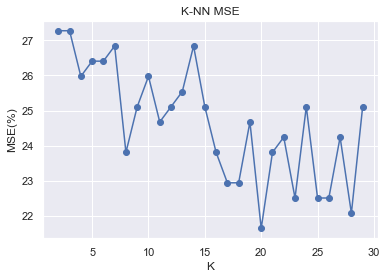

Best k=20, MSE=21.65%


In [61]:
data = pd.DataFrame(scaler.inverse_transform(reduced_iter_imputed_data), columns=pca_reduced.columns)
data['nutrition_grade'] = data['nutrition_grade'].astype('int')

iter_imputed_best_k, iter_imputed_min_error, iter_imputed_best_knn, iter_imputed_errors, iter_imputed_ks = best_knn(data, Y='nutrition_grade', regression=False, repeat_factor=100)
print('Best k=' + str(iter_imputed_best_k) + ', MSE=' + str(round(iter_imputed_min_error,2)) + '%')

if iter_imputed_min_error < best_knn_mse:
    best_knn_model = iter_imputed_best_knn
    best_imputed_data = iter_imputed_data

## 4.3- Sur l'Imputation K-NN

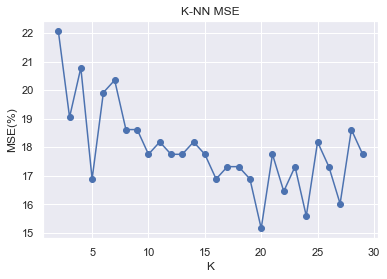

Best k=20, MSE=15.15%


In [62]:
data = pd.DataFrame(scaler.inverse_transform(reduced_knn_imputed_data), columns=pca_reduced.columns)
data['nutrition_grade'] = data['nutrition_grade'].astype('int')

knn_imputed_best_k, knn_imputed_min_error, knn_imputed_best_knn, knn_imputed_errors, knn_imputed_ks = best_knn(data, Y='nutrition_grade', regression=False, repeat_factor=100)
print('Best k=' + str(knn_imputed_best_k) + ', MSE=' + str(round(knn_imputed_min_error,2)) + '%')

if knn_imputed_min_error < best_knn_mse:
    best_knn_model = knn_imputed_best_knn
    best_imputed_data = knn_imputed_data

## 4.4- Comparaison des 3 modèles

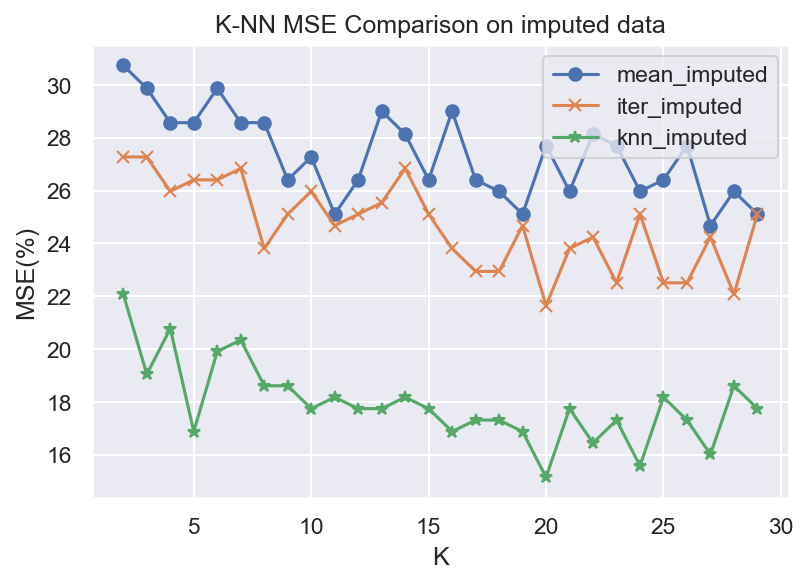

In [63]:
plt.figure(dpi=150)
plt.plot(mean_imputed_ks, mean_imputed_errors, 'o-', label='mean_imputed')
plt.plot(iter_imputed_ks, iter_imputed_errors, 'x-', label='iter_imputed')
plt.plot(knn_imputed_ks, knn_imputed_errors, '*-', label='knn_imputed')
plt.legend()
plt.title('K-NN MSE Comparison on imputed data')
plt.xlabel('K')
plt.ylabel('MSE(%)')
plt.show()

## 4.5- Application du Modèle Prédictif

In [90]:
# Sélection d'un petit échantillon aléatoire
# Ré-échantillonner tant qu'il y a au moins une colonne vide
sample = np.random.randint(len(mean_imputed_data), size=10)
test_df = mean_imputed_data.iloc[sample]
Y = mean_imputed_data.iloc[sample]['nutrition_grade']
# stop = False
# while not stop :
#     sample = np.random.randint(len(df), size=10)
#     test_df = df.iloc[sample]
#     stop = len(nan_cols(test_df, 100)) == 0
test_Y, scaler_y = MinMax_Scaled(test_df[['nutrition_grade']], frame=True, return_scaler=True)
test_X = MinMax_Scaled(test_df, frame=True)

In [91]:
# Imputation et normalisation
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=10, weights='distance')
knn_imputer_transfom = knn_imputer.fit(best_imputed_data)
test_X = knn_imputer_transfom.transform(test_X)
test_X = pd.DataFrame(scaler.inverse_transform(test_X), columns = test_df.columns, index=test_df.index)
test_X,scaler = Std_Scaled(test_X, frame=True, return_scaler=True)

In [92]:
# Réduction par ACPs
test_reduced = pd.DataFrame(index=test_df.index)

for group_name, group_cols in groups_cols.items():    
    test_reduced = pd.concat([test_reduced, PCA_Compression(test_X, pcs_lvl1[group_name], group_cols, group_name)], axis=1)

test_X = PCA_Compression(test_reduced, pcs_lvl2)

In [93]:
Y

227055    3.0
180332    4.0
294860    0.0
227309    3.0
263591    1.0
209261    0.0
204162    1.0
200622    3.0
225903    1.0
306168    2.0
Name: nutrition_grade, dtype: float64

In [94]:
# Prédiction par K-NN
predictions = best_knn_model.predict(test_X)
predictions = pd.DataFrame({'Predictions':predictions}, index=test_Y.index)
predictions = scaler_y.inverse_transform(predictions)
predictions

array([[8.],
       [8.],
       [8.],
       [8.],
       [8.],
       [8.],
       [8.],
       [8.],
       [8.],
       [8.]])

## 4.6- Conclusions sur le Modèle Prédectif

On peut constater que les performances (taux d'erreur de prédiction) des modèles s'améliore en passant d'une méthode d'imputation à la suivante. Plus particulièrement, l'imputation par K-NN présente les meilleurs résultats car se basant sur les valeurs de produits les plus similaires/proches.
<br>
Il est aussi important de rappeler que l'algorithmes K-NN est basé sur la mémoire : le modèle inclut toutes les données d'apprentissage et non pas une approximation, ce qui rend une bonne réduction dimensionnelle d'autant plus nécessaire et critique.